In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [3]:
dfene = pd.read_csv("../input/sales_2017_enero.csv")

In [4]:
stores = pd.read_csv("../input/stores.csv")

In [5]:
dfcasas = pd.read_csv("../output/data.csv")

In [6]:
dfcasas["preciopmt2"] = dfcasas.precio / dfcasas.metroscuadradostotales

In [7]:
dfcasas

,antigüedad,cuartos,cuartosdebaño,estacionamiento,metroscuadradostotales,precio,publicado,tipodevendedor,titulo,lat,long,preciopmt2
0,5,4,4,0,480,565000,NaN,NaN,Arrecife - Punta Mocoli Design By Jannina Cabal,-2.115345,-79.856163,1177.083333
1,20,4,4,3,244,140000,NaN,NaN,Venta de Casa Cdla. del Biess Remodelada - Sec...,-2.230328,-79.902163,573.770492
2,En construcción,0,4,2,1,259000,NaN,NaN,Se Vende Proyecto en Isla Celeste Reserva Solo...,-2.071614,-79.842065,259000.000000
3,A estrenar,4,4,0,245,245000,NaN,NaN,Isla Celeste 243 m² Const y 225 m² Terreno Her...,-2.079416,-79.837993,1000.000000
4,A estrenar,0,4,2,1090,650000,NaN,NaN,"Casa 1 Planta Al Lago - 4 D - $650,000",-2.142226,-79.864596,596.330275
...,...,...,...,...,...,...,...,...,...,...,...,...
2284,NaN,0,1,3,233,250000,NaN,NaN,Casa Esquinera en La Puntilla,-2.229309,-79.935185,1072.961373
2285,10,4,6,4,670,298000,NaN,NaN,Vendo Casa Cdla. Santa Cecilia Via a La Costa ...,-2.162710,-79.941728,444.776119
2286,5,3,3,2,250,270000,NaN,NaN,Vendo Linda Casa en Los Primeros Kms de Sambor...,-2.140583,-79.868761,1080.000000
2287,4,3,2,1,136,120000,NaN,NaN,"Venta Casa en Urb. Villa Club, etapa Jupiter, ...",-2.028782,-79.895465,882.352941


<Axes: ylabel='preciopmt2'>

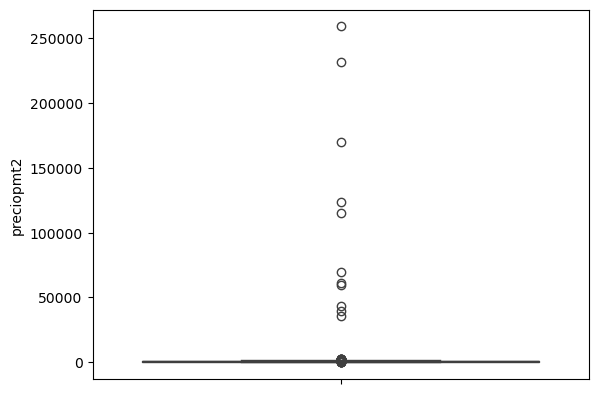

In [8]:
sns.boxplot(dfcasas.preciopmt2)

<Axes: ylabel='metroscuadradostotales'>

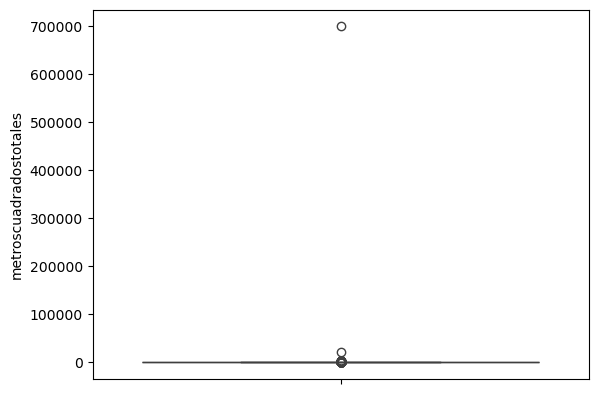

In [9]:
sns.boxplot(dfcasas.metroscuadradostotales)

<Axes: xlabel='precio'>

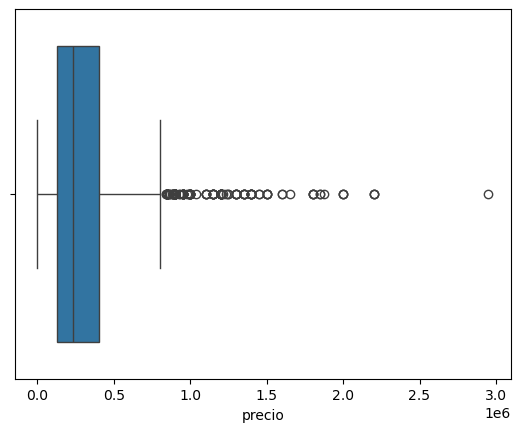

In [10]:
sns.boxplot(dfcasas.precio, orient = "h")

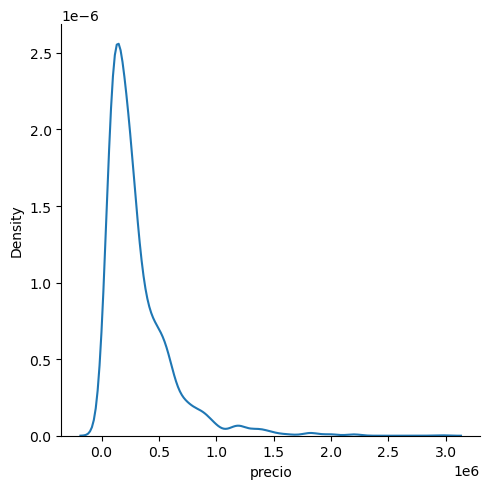

In [11]:
sns.displot(dfcasas.precio, kind="kde")

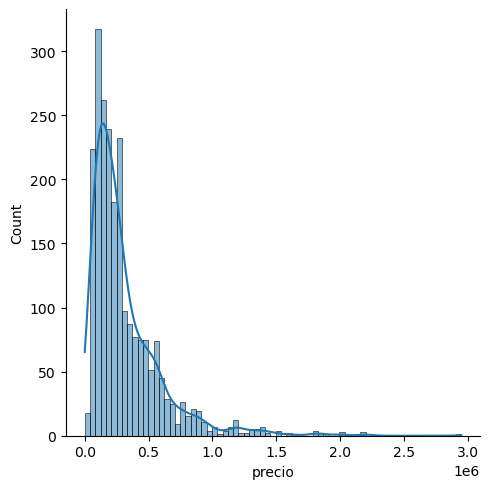

In [12]:
sns.displot(dfcasas.precio, kde=True)

In [13]:
dfene.dtypes

id               int64
date            object
store_nbr        int64
item_nbr         int64
unit_sales     float64
onpromotion       bool
dtype: object

In [14]:
dfene["date"] = pd.to_datetime(dfene.date)

In [15]:
dfene["day"] = dfene.date.dt.day

In [16]:
dfene

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day
0,101688779,2017-01-01,25,99197,1.0,False,1
1,101688780,2017-01-01,25,103665,7.0,False,1
2,101688781,2017-01-01,25,105574,1.0,False,1
3,101688782,2017-01-01,25,105857,4.0,False,1
4,101688783,2017-01-01,25,106716,2.0,False,1
...,...,...,...,...,...,...,...
3134765,104823544,2017-01-31,54,2048300,3.0,False,31
3134766,104823545,2017-01-31,54,2048313,3.0,False,31
3134767,104823546,2017-01-31,54,2048421,5.0,False,31
3134768,104823547,2017-01-31,54,2048471,4.0,False,31


In [17]:
ser = dfene.groupby("day")["unit_sales"].sum()

In [18]:
ser

day
1       12082.501
2     1402305.371
3     1104377.080
4      990093.463
5      777620.954
6      839600.238
7     1103806.299
8     1192543.751
9      793686.897
10     742635.569
11     770742.690
12     629635.794
13     768898.944
14    1021050.536
15    1175725.166
16     824488.666
17     750836.543
18     782656.025
19     606949.745
20     725703.691
21    1072721.725
22    1148213.359
23     798133.612
24     721275.775
25     744342.593
26     576515.537
27     722113.959
28     977850.406
29    1075166.993
30     698122.768
31     778222.286
Name: unit_sales, dtype: float64

<Axes: xlabel='day', ylabel='unit_sales'>

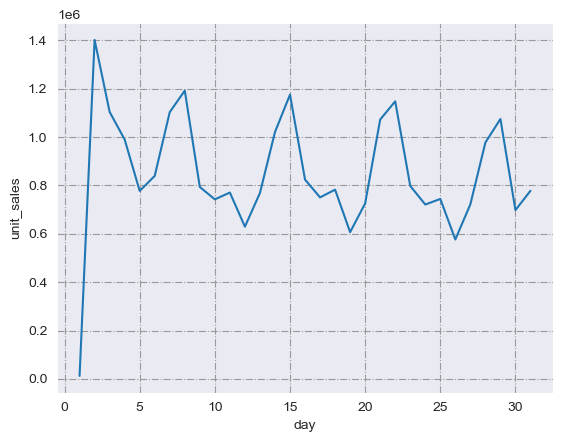

In [19]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": "-."})
sns.lineplot(ser)

In [20]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [21]:
dfene = dfene.merge(stores, on="store_nbr")

In [22]:
table = pd.pivot_table(data=dfene, index="day", columns="state", values="unit_sales", aggfunc="sum").fillna(0)

In [23]:
table

state,Azuay,Bolivar,Chimborazo,Cotopaxi,El Oro,Esmeraldas,Guayas,Imbabura,Loja,Los Rios,Manabi,Pastaza,Pichincha,Santa Elena,Santo Domingo de los Tsachilas,Tungurahua
day,,,,,,,,,,,,,,,,
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,12082.501,0.000,0.000
2,68664.973,14740.575,11286.673,22363.921,37184.036,22039.874,175406.941,10599.047,24049.411,35975.177,30418.916,10861.359,821605.020,12856.309,48922.429,55330.710
3,63318.873,12021.391,11285.576,19371.963,35703.000,23245.542,166007.529,10784.568,15518.435,31392.635,25331.114,10133.983,593083.064,10151.416,38586.827,38441.164
4,57893.555,9595.004,8254.927,16618.047,34315.860,16016.361,147051.186,10005.204,17074.532,22180.072,21897.483,8536.269,543055.877,10568.078,32720.393,34310.615
5,38579.964,7987.399,8036.801,14411.678,23820.454,14851.552,119831.590,8229.047,10425.993,22426.759,17820.650,6886.507,421969.240,7351.635,26862.912,28128.773
6,42976.237,7458.260,6588.171,12910.276,24379.124,12008.624,127639.278,7233.708,14396.402,19163.526,18086.182,5752.761,475042.244,9722.868,26194.816,30047.761
7,62797.496,13479.617,11198.871,17911.240,32577.316,14444.522,141918.880,9934.524,19173.057,27709.433,23401.744,7321.675,635830.965,11052.964,34836.211,40217.784
8,57500.517,9983.823,7809.269,15940.986,34508.803,16341.951,163244.292,8543.126,19093.529,34620.409,30103.929,8250.718,699178.089,8295.360,37018.209,42110.741
9,44365.943,8398.525,8218.719,15048.759,25791.367,13680.334,105720.509,9777.866,10780.664,20168.714,19413.625,6496.633,439697.323,6932.362,29983.224,29212.330


<Axes: xlabel='state', ylabel='day'>

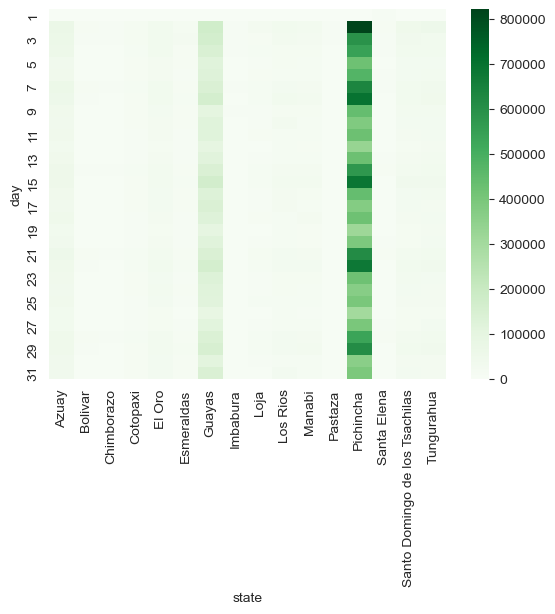

In [24]:
sns.heatmap(table,cmap="Greens")

In [25]:
dfene

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day,city,state,type,cluster
0,101688779,2017-01-01,25,99197,1.0,False,1,Salinas,Santa Elena,D,1
1,101688780,2017-01-01,25,103665,7.0,False,1,Salinas,Santa Elena,D,1
2,101688781,2017-01-01,25,105574,1.0,False,1,Salinas,Santa Elena,D,1
3,101688782,2017-01-01,25,105857,4.0,False,1,Salinas,Santa Elena,D,1
4,101688783,2017-01-01,25,106716,2.0,False,1,Salinas,Santa Elena,D,1
...,...,...,...,...,...,...,...,...,...,...,...
3134765,104823544,2017-01-31,54,2048300,3.0,False,31,El Carmen,Manabi,C,3
3134766,104823545,2017-01-31,54,2048313,3.0,False,31,El Carmen,Manabi,C,3
3134767,104823546,2017-01-31,54,2048421,5.0,False,31,El Carmen,Manabi,C,3
3134768,104823547,2017-01-31,54,2048471,4.0,False,31,El Carmen,Manabi,C,3


In [26]:
dfgye = dfene.loc[dfene.city == "Guayaquil",:]

In [27]:
sergye = dfgye.groupby("day")["unit_sales"].sum()

In [28]:
dfuio = dfene.loc[dfene.city == "Quito",:]

In [29]:
seruio = dfuio.groupby("day")["unit_sales"].sum()

In [30]:
sns.lineplot?

Signature:
sns.lineplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    units=None,
    weights=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    dashes=True,
    markers=None,
    style_order=None,
    estimator='mean',
    errorbar=('ci', 95),
    n_boot=1000,
    seed=None,
    orient='x',
    sort=True,
    err_style='band',
    err_kws=None,
    legend='auto',
    ci='deprecated',
    ax=None,
    **kwargs,
)
Docstring:
Draw a line plot with possibility of several semantic groupings.

The relationship between `x` and `y` can be shown for different subsets
of the data using the `hue`, `size`, and `style` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ine

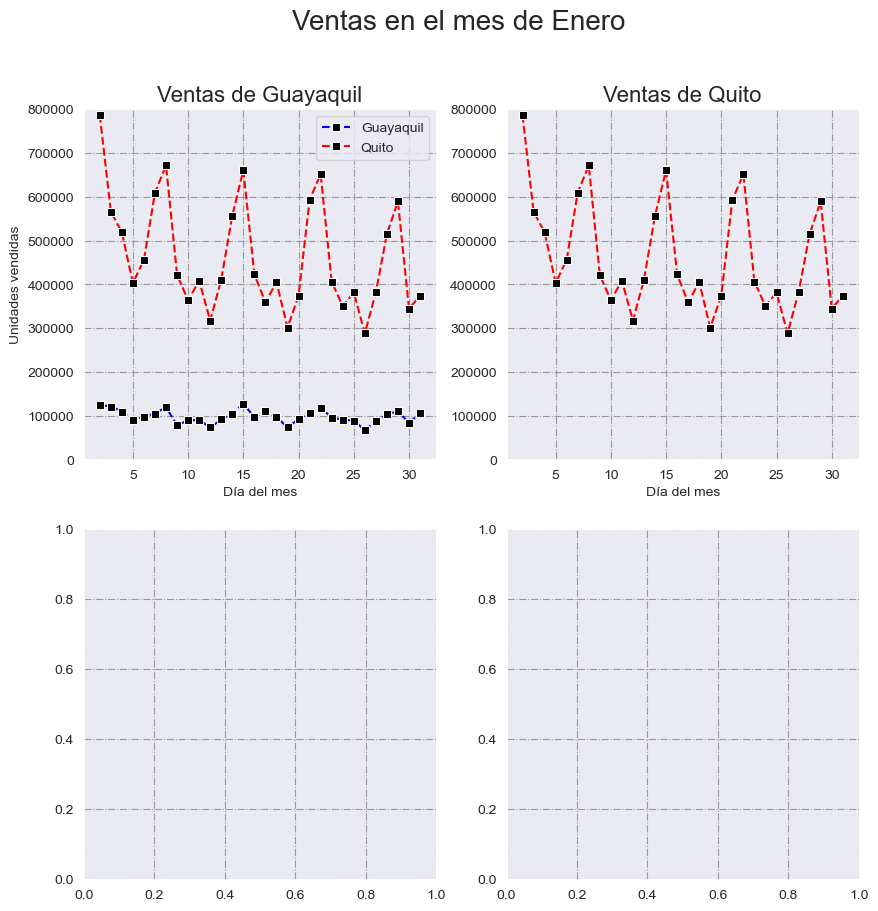

In [31]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
# _ = sns.lineplot(sergye,ax=ax[0], color="b", marker="s", mfc = "k", linestyle = "--")
# _ = sns.lineplot(seruio,ax=ax[0], color="r", marker="s", mfc = "k", linestyle = "--")
# _ = ax[0].set_ylim(0,800000)
# _ = ax[0].set_ylabel("Unidades vendidas")
# _ = ax[0].set_xlabel("Día del mes")
# _ = ax[0].set_title("Ventas de Guayaquil",{"fontsize":16})
# _ = sns.lineplot(seruio,ax=ax[1], color="r", marker="s", mfc = "k", linestyle = "--")
# _ = ax[1].set_ylim(0,800000)
# _ = ax[1].set_ylabel("")
# _ = ax[1].set_xlabel("Día del mes")
# _ = ax[1].set_title("Ventas de Quito",{"fontsize":16})
# _ = fig.suptitle("Ventas en el mes de Enero", fontsize=20)
_ = sns.lineplot(sergye,ax=ax[0,0], color="b", marker="s", mfc = "k", linestyle = "--", label="Guayaquil")
_ = sns.lineplot(seruio,ax=ax[0,0], color="r", marker="s", mfc = "k", linestyle = "--", label="Quito")
_ = ax[0,0].set_ylim(0,800000)
_ = ax[0,0].set_ylabel("Unidades vendidas")
_ = ax[0,0].set_xlabel("Día del mes")
_ = ax[0,0].set_title("Ventas de Guayaquil",{"fontsize":16})
_ = sns.lineplot(seruio,ax=ax[0,1], color="r", marker="s", mfc = "k", linestyle = "--")
_ = ax[0,1].set_ylim(0,800000)
_ = ax[0,1].set_ylabel("")
_ = ax[0,1].set_xlabel("Día del mes")
_ = ax[0,1].set_title("Ventas de Quito",{"fontsize":16})
_ = fig.suptitle("Ventas en el mes de Enero", fontsize=20)

In [32]:
dfstate = dfene.groupby("state")["unit_sales"].sum().reset_index()

In [33]:
dfstate

,state,unit_sales
0,Azuay,1.398127e+06
1,Bolivar,2.701005e+05
2,Chimborazo,2.390325e+05
3,Cotopaxi,4.390210e+05
4,El Oro,8.317460e+05
5,Esmeraldas,4.257802e+05
6,Guayas,3.954602e+06
7,Imbabura,2.494766e+05
8,Loja,4.182667e+05
9,Los Rios,7.024218e+05


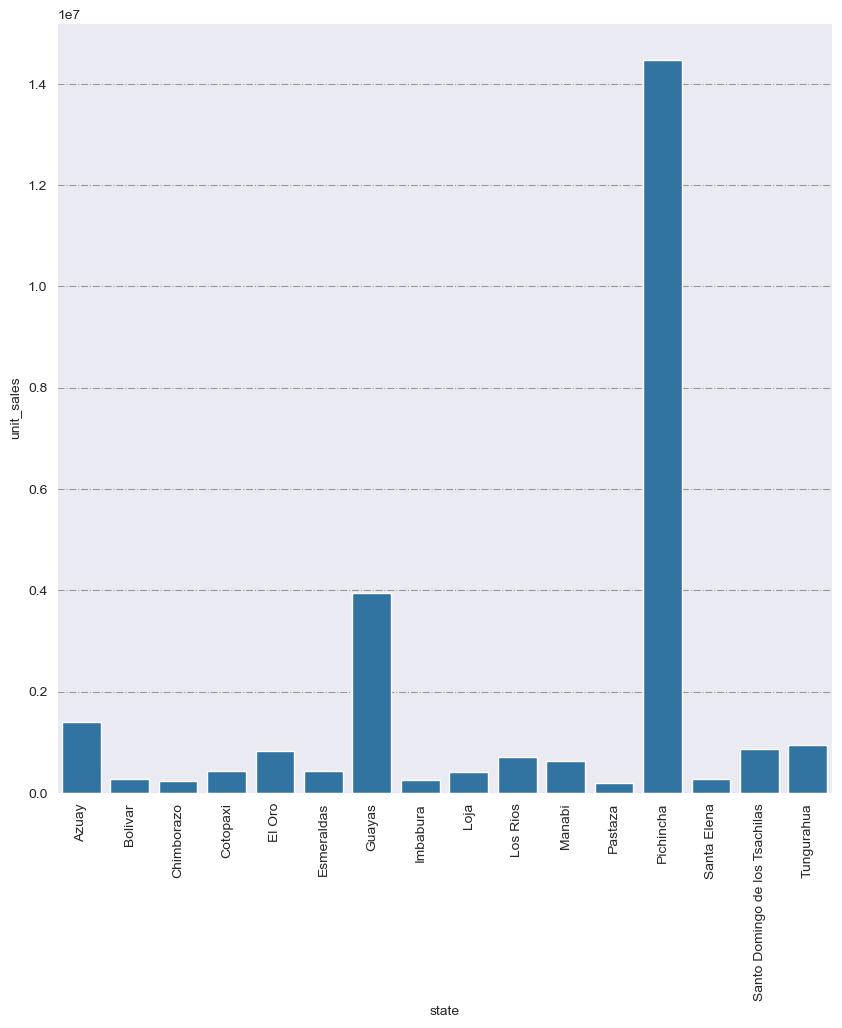

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
_= sns.barplot(data=dfstate, x="state", y="unit_sales",ax = ax)
_=plt.xticks(rotation = 90)

In [35]:
#sns.barplot(data=dfene, x="state", y = "unit_sales", hue="state")

In [36]:
dfcasas["barrio"] = "NO ASIGNADO"

In [37]:
dfcasas

,antigüedad,cuartos,cuartosdebaño,estacionamiento,metroscuadradostotales,precio,publicado,tipodevendedor,titulo,lat,long,preciopmt2,barrio
0,5,4,4,0,480,565000,NaN,NaN,Arrecife - Punta Mocoli Design By Jannina Cabal,-2.115345,-79.856163,1177.083333,NO ASIGNADO
1,20,4,4,3,244,140000,NaN,NaN,Venta de Casa Cdla. del Biess Remodelada - Sec...,-2.230328,-79.902163,573.770492,NO ASIGNADO
2,En construcción,0,4,2,1,259000,NaN,NaN,Se Vende Proyecto en Isla Celeste Reserva Solo...,-2.071614,-79.842065,259000.000000,NO ASIGNADO
3,A estrenar,4,4,0,245,245000,NaN,NaN,Isla Celeste 243 m² Const y 225 m² Terreno Her...,-2.079416,-79.837993,1000.000000,NO ASIGNADO
4,A estrenar,0,4,2,1090,650000,NaN,NaN,"Casa 1 Planta Al Lago - 4 D - $650,000",-2.142226,-79.864596,596.330275,NO ASIGNADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2284,NaN,0,1,3,233,250000,NaN,NaN,Casa Esquinera en La Puntilla,-2.229309,-79.935185,1072.961373,NO ASIGNADO
2285,10,4,6,4,670,298000,NaN,NaN,Vendo Casa Cdla. Santa Cecilia Via a La Costa ...,-2.162710,-79.941728,444.776119,NO ASIGNADO
2286,5,3,3,2,250,270000,NaN,NaN,Vendo Linda Casa en Los Primeros Kms de Sambor...,-2.140583,-79.868761,1080.000000,NO ASIGNADO
2287,4,3,2,1,136,120000,NaN,NaN,"Venta Casa en Urb. Villa Club, etapa Jupiter, ...",-2.028782,-79.895465,882.352941,NO ASIGNADO


In [38]:
dfcasas.loc[dfcasas.titulo.str.lower().str.contains("alborada"),"barrio"]="ALBORADA"

In [39]:
dfcasas.loc[dfcasas.titulo.str.lower().str.contains("sauces"),"barrio"]="SAUCES"

In [40]:
dfcasas.loc[dfcasas.titulo.str.lower().str.contains("sambo"),"barrio"]="SAMBORONDON"

In [41]:
dfcasas.barrio.value_counts()

barrio
NO ASIGNADO    1722
SAMBORONDON     505
ALBORADA         32
SAUCES           30
Name: count, dtype: int64

<Axes: xlabel='barrio', ylabel='preciopmt2'>

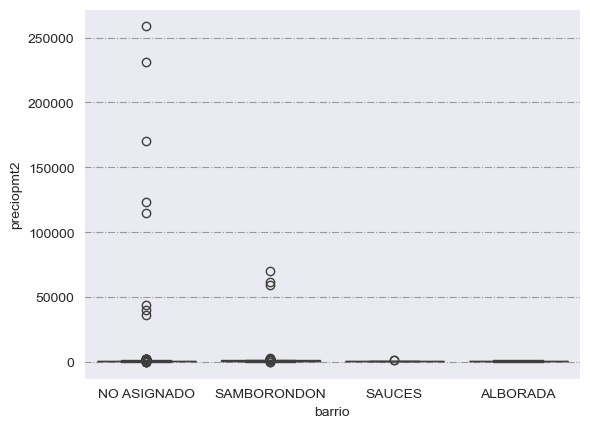

In [42]:
sns.boxplot(data=dfcasas, x="barrio", y="preciopmt2")

In [43]:
q1 = dfcasas.preciopmt2.quantile(0.25)
q3 = dfcasas.preciopmt2.quantile(0.75)
iqr = q3-q1

In [44]:
q1

641.6666666666666

In [45]:
q3

1038.4615384615386

In [46]:
iqr

396.79487179487194

In [47]:
dfcasas.loc[(dfcasas.preciopmt2>q3+1.5*iqr)|(dfcasas.preciopmt2<q1-1.5*iqr),:]

,antigüedad,cuartos,cuartosdebaño,estacionamiento,metroscuadradostotales,precio,publicado,tipodevendedor,titulo,lat,long,preciopmt2,barrio
2,En construcción,0,4,2,1,259000,NaN,NaN,Se Vende Proyecto en Isla Celeste Reserva Solo...,-2.071614,-79.842065,259000.000000,NO ASIGNADO
130,En construcción,4,4,2,390,650000,NaN,NaN,Vendo Casa en Proyecto con Vista Al Lago en Is...,-2.112298,-79.858357,1666.666667,NO ASIGNADO
172,5,3,3,2,650,1500000,NaN,NaN,Plaza Lagos Urb. Islalago Vendo Casa de Lujo,-2.097967,-79.874552,2307.692308,NO ASIGNADO
182,15,3,3,2,1,170000,NaN,NaN,Casa y Terreno Via a La Costa,-2.189836,-79.966974,170000.000000,NO ASIGNADO
226,18,3,3,2,540,1100000,NaN,NaN,Samborondon Km 5 - Casa de 1 Piso - Vista Al R...,-2.111273,-79.871226,2037.037037,SAMBORONDON
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060,12,3,3,2,260,465000,NaN,NaN,Villa en Venta Las Riberas / Via Samborondon A...,-2.142035,-79.863459,1788.461538,SAMBORONDON
2082,A estrenar,4,4,3,530,1350000,NaN,NaN,Casa - Samborondón,-2.097967,-79.874552,2547.169811,SAMBORONDON
2128,NaN,45,4,2,3,370000,NaN,NaN,Casa - Centro de Guayaquil,0.968179,-79.651720,123333.333333,NO ASIGNADO
2148,NaN,1,2,4,285,525000,NaN,NaN,Casa - Aires del Batan - Samborondón,-2.217499,-79.923774,1842.105263,SAMBORONDON


In [48]:
dfcasas = dfcasas.loc[dfcasas.metroscuadradostotales>0,:]

In [49]:
media = dfcasas.preciopmt2.mean()
std = dfcasas.preciopmt2.std()

In [50]:
media

1384.2938657423585

In [51]:
std

9175.64810203896

In [52]:
dfcasas.preciopmt2.describe()

count      2286.000000
mean       1384.293866
std        9175.648102
min           0.000368
25%         641.394928
50%         839.363696
75%        1036.239496
max      259000.000000
Name: preciopmt2, dtype: float64

In [53]:
dfcasas["zscore"] = (dfcasas.preciopmt2 - media)/std

C:\Users\sebas\AppData\Local\Temp\ipykernel_6888\737704781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcasas["zscore"] = (dfcasas.preciopmt2 - media)/std


In [54]:
dfcasas.loc[(dfcasas.zscore>3)|(dfcasas.zscore<-3),:]

,antigüedad,cuartos,cuartosdebaño,estacionamiento,metroscuadradostotales,precio,publicado,tipodevendedor,titulo,lat,long,preciopmt2,barrio,zscore
2,En construcción,0,4,2,1,259000,NaN,NaN,Se Vende Proyecto en Isla Celeste Reserva Solo...,-2.071614,-79.842065,259000.000000,NO ASIGNADO,28.076023
182,15,3,3,2,1,170000,NaN,NaN,Casa y Terreno Via a La Costa,-2.189836,-79.966974,170000.000000,NO ASIGNADO,18.376436
659,4,3,2,1,1,115000,NaN,NaN,Venta - Departamento - Vía a La Costa - Urbani...,-2.185631,-80.006013,115000.000000,NO ASIGNADO,12.382309
802,NaN,A estrenar,4,1,4,245000,NaN,NaN,Casa - Isla Celeste - Estribor - Samborondón,-2.069432,-79.841692,61250.000000,SAMBORONDON,6.524412
983,NaN,3,3,2,5,180000,NaN,NaN,Casa - Norte de Guayaquil,-2.132660,-79.907730,36000.000000,NO ASIGNADO,3.772563
1154,NaN,A estrenar,4,0,3,178000,NaN,NaN,Casa - Samborondón,-2.068189,-79.832929,59333.333333,SAMBORONDON,6.315525
1311,NaN,A estrenar,4,1,4,925000,NaN,NaN,Venta de Espectacular Casa de Lujo con Vista A...,-2.154570,-79.865909,231250.000000,NO ASIGNADO,25.051713
1473,NaN,A estrenar,3,1,4,280000,NaN,NaN,Casa - Samborondón,-2.051928,-79.897691,70000.000000,SAMBORONDON,7.478023
1829,NaN,A estrenar,3,0,2,87000,NaN,NaN,Casa - Centro de Guayaquil,-2.196955,-79.908365,43500.000000,NO ASIGNADO,4.589943
1902,NaN,A estrenar,4,1,4,159000,NaN,NaN,Casa - Vía a La Costa,-2.187973,-80.020978,39750.000000,NO ASIGNADO,4.181253


In [55]:
dfcasas = dfcasas.loc[(dfcasas.preciopmt2<q3+1.5*iqr)&(dfcasas.preciopmt2>q1-1.5*iqr),:]

In [56]:
dfcasas

,antigüedad,cuartos,cuartosdebaño,estacionamiento,metroscuadradostotales,precio,publicado,tipodevendedor,titulo,lat,long,preciopmt2,barrio,zscore
0,5,4,4,0,480,565000,NaN,NaN,Arrecife - Punta Mocoli Design By Jannina Cabal,-2.115345,-79.856163,1177.083333,NO ASIGNADO,-0.022583
1,20,4,4,3,244,140000,NaN,NaN,Venta de Casa Cdla. del Biess Remodelada - Sec...,-2.230328,-79.902163,573.770492,NO ASIGNADO,-0.088334
3,A estrenar,4,4,0,245,245000,NaN,NaN,Isla Celeste 243 m² Const y 225 m² Terreno Her...,-2.079416,-79.837993,1000.000000,NO ASIGNADO,-0.041882
4,A estrenar,0,4,2,1090,650000,NaN,NaN,"Casa 1 Planta Al Lago - 4 D - $650,000",-2.142226,-79.864596,596.330275,NO ASIGNADO,-0.085876
5,10,3,3,2,580,425000,NaN,NaN,Samborondon Km 4 - Urb San Isidro - Casa 3 Dor...,-2.119008,-79.868939,732.758621,SAMBORONDON,-0.071007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2284,NaN,0,1,3,233,250000,NaN,NaN,Casa Esquinera en La Puntilla,-2.229309,-79.935185,1072.961373,NO ASIGNADO,-0.033930
2285,10,4,6,4,670,298000,NaN,NaN,Vendo Casa Cdla. Santa Cecilia Via a La Costa ...,-2.162710,-79.941728,444.776119,NO ASIGNADO,-0.102393
2286,5,3,3,2,250,270000,NaN,NaN,Vendo Linda Casa en Los Primeros Kms de Sambor...,-2.140583,-79.868761,1080.000000,SAMBORONDON,-0.033163
2287,4,3,2,1,136,120000,NaN,NaN,"Venta Casa en Urb. Villa Club, etapa Jupiter, ...",-2.028782,-79.895465,882.352941,NO ASIGNADO,-0.054704


<Axes: xlabel='barrio', ylabel='preciopmt2'>

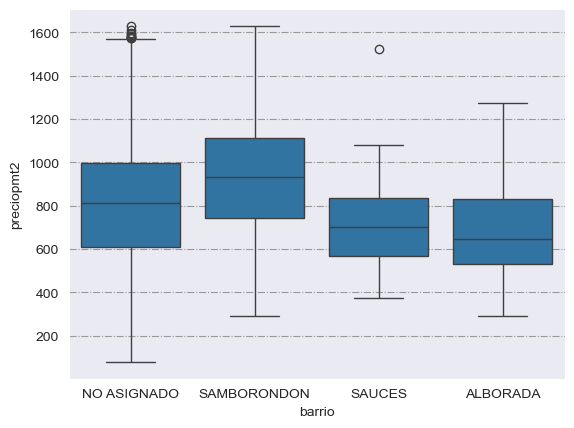

In [57]:
sns.boxplot(data=dfcasas, x="barrio", y="preciopmt2")

In [58]:
dfcasas.loc[:,["precio","metroscuadradostotales"]].corr()

,precio,metroscuadradostotales
precio,1.000000,0.814922
metroscuadradostotales,0.814922,1.000000


In [59]:
dfcasas.loc[:,["precio","metroscuadradostotales"]].corr(method="spearman")

,precio,metroscuadradostotales
precio,1.000000,0.879124
metroscuadradostotales,0.879124,1.000000


In [60]:
stats.spearmanr(dfcasas["precio"],dfcasas["metroscuadradostotales"])

SignificanceResult(statistic=0.8791236558942007, pvalue=0.0)

In [61]:
stats.pearsonr(dfcasas["precio"],dfcasas["metroscuadradostotales"])

PearsonRResult(statistic=0.8149219681996329, pvalue=0.0)

<Axes: xlabel='metroscuadradostotales', ylabel='precio'>

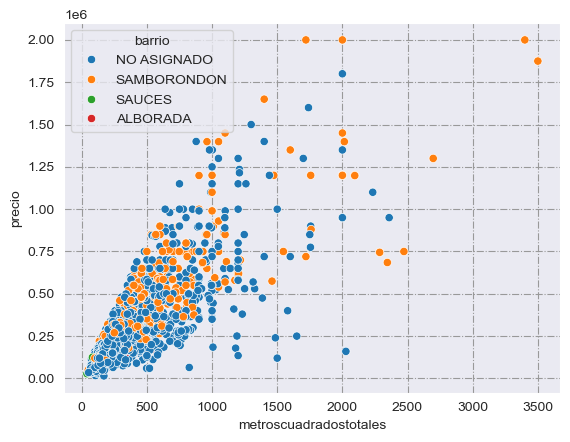

In [62]:
sns.scatterplot(data=dfcasas, x = "metroscuadradostotales", y = "precio", hue = "barrio")

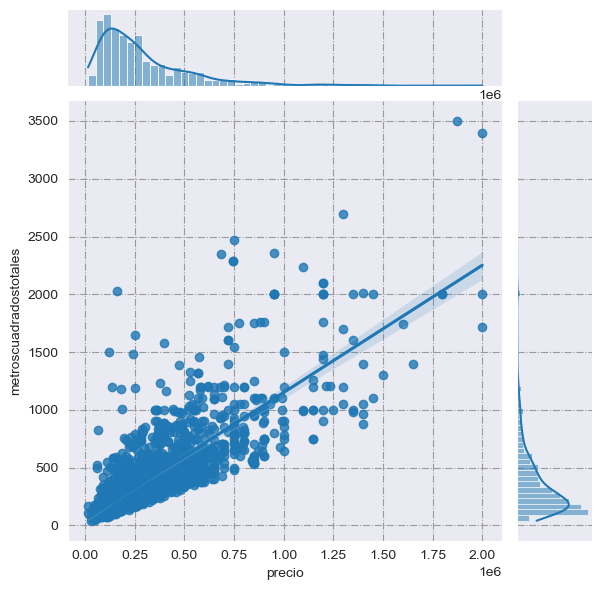

In [63]:
sns.jointplot(data=dfcasas, x="precio", y="metroscuadradostotales", kind="reg")